### Import Dependencies

In [1]:
# pip install tensorflow<2.11
# pip install numpy

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import keras 

# check for GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Splitting the data into training and testing

In [7]:
img_height, img_width = 256,256

BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    "..\\..\\..\\grades\\",
    validation_split=0.2,
    subset="training",
    seed=123,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "..\\..\\..\\grades\\",
    validation_split=0.2,
    subset="validation",
    seed=123,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE)

Found 152 files belonging to 3 classes.
Using 122 files for training.
Found 152 files belonging to 3 classes.
Using 30 files for validation.


### Visualize the data

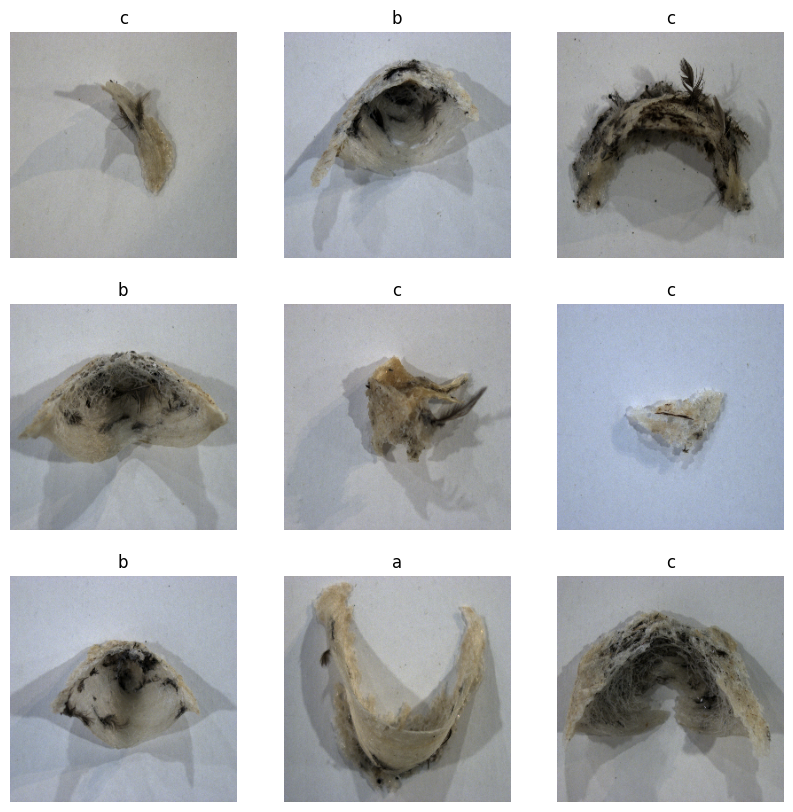

In [8]:
class_names = train_ds.class_names
test = train_ds.take(1)
plt.figure(figsize=(10, 10))

for images, labels in train_ds:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Compiling the model

In [9]:
resnet_model = tf.keras.Sequential()
resnet = tf.keras.applications.resnet50.ResNet50(input_shape=(256, 256, 3))
resnet_model.add(resnet)
num_classes = 3 # highly depends on how many grades of EBN

resnet_model.add(tf.keras.layers.Flatten())

# 128 neurons because our input data is not a lot
resnet_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
resnet_model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training the model

In [10]:
EPOCH = 4
resnet_model.fit(train_ds, epochs=EPOCH) 
resnet_model.save("resnet50model")

Epoch 1/4


8/8 [==============================] - 10s 397ms/step - loss: 4.4541 - accuracy: 0.3197
Epoch 2/4
8/8 [==============================] - 2s 203ms/step - loss: 0.4615 - accuracy: 0.8279
Epoch 3/4
8/8 [==============================] - 2s 202ms/step - loss: 0.1277 - accuracy: 0.9590
Epoch 4/4
8/8 [==============================] - 2s 202ms/step - loss: 0.0448 - accuracy: 1.0000


INFO:tensorflow:Assets written to: resnet50model\assets


INFO:tensorflow:Assets written to: resnet50model\assets


### Opening the model and re-using again

In [11]:
# some code of evaluating the model here
model = keras.models.load_model("resnet50model")
test_loss, test_acc = model.evaluate(test_ds)

print('Test accuracy:', test_acc)

2/2 [==============================] - 4s 577ms/step - loss: 1.0542 - accuracy: 0.6333
Test accuracy: 0.6333333253860474


### Evaluating the Model

In [12]:
# some code of evaluating the model here
test_loss, test_acc = resnet_model.evaluate(test_ds)

print('Test accuracy:', test_acc)

2/2 [==============================] - 1s 78ms/step - loss: 1.0542 - accuracy: 0.6333
Test accuracy: 0.6333333253860474
